In [444]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')

set_matplotlib_formats('retina')

In [445]:
df = pd.read_csv('data/merged_data.csv', encoding='cp949')
df.columns

Index(['Unnamed: 0', '사업자번호', '기업명', '주요사업', '주소', '규모', '산업명', '종업원수', '자산총계',
       '총부채', '자본총계', '매출액', '영업이익', '당기순이익', '영업이익률', 'TotalAvg', 'Welfare',
       'Balance', 'Culture', 'Promotion', 'Executive', 'Recommend', 'Support',
       'Growth', 'review', 'structure', '지역'],
      dtype='object')

# 전처리

In [446]:
del df['Unnamed: 0']
del df['사업자번호']
del df['기업명']
del df['주요사업']
del df['주소']
del df['review']

In [447]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
규모,중소기업,중소기업,중견기업,중소기업,중소기업,중소기업,중소기업,중소기업,중소기업,중소기업,...,중소기업,중소기업,대기업,중소기업,중소기업,중소기업,중소기업,중소기업,중소기업,중소기업
산업명,기타 정보기술 및 컴퓨터 운영 관련 서비스업,"컴퓨터시스템 통합 자문, 구축 및 관리업",컴퓨터 프로그래밍 서비스업,컴퓨터 프로그래밍 서비스업,컴퓨터 프로그래밍 서비스업,컴퓨터 시설 관리업,"컴퓨터시스템 통합 자문, 구축 및 관리업",컴퓨터시스템 통합 자문 및 구축 서비스업,컴퓨터 프로그래밍 서비스업,컴퓨터시스템 통합 자문 및 구축 서비스업,...,"컴퓨터 및 주변장치, 소프트웨어 도매업",통신 및 방송 장비 제조업,통신 재판매업,그 외 기타 금융 지원 서비스업,응용 소프트웨어 개발 및 공급업,통신·방송장비 및 부품 도매업,통신 및 방송 장비 제조업,통신·방송장비 및 부품 도매업,통신 판매업,통신장비 수리업
종업원수,55,23,97,230,53,777,30,81,35,59,...,7,14,89,269,9,9,6,45,200,7
자산총계,8.85515e+06,3.20412e+06,3.93562e+07,2.60419e+07,2.92874e+06,2.52884e+07,9.84903e+06,1.45848e+07,734090,2.2124e+07,...,2.30565e+06,1.65439e+06,1.35917e+08,2.40101e+08,1.08146e+06,3.44505e+06,3.45074e+06,1.8776e+06,5.32365e+07,769805
총부채,2.58717e+06,1.88045e+06,1.86975e+07,1.16597e+07,1.61874e+06,1.26814e+07,5.85968e+06,1.13071e+07,261664,1.84066e+07,...,608303,550990,3.06029e+07,4.09851e+07,283980,1.84167e+06,2.39145e+06,810098,2.9862e+07,598736
자본총계,6.26797e+06,1.32368e+06,2.06586e+07,1.43822e+07,1.31e+06,1.26069e+07,3.98935e+06,3.27764e+06,472426,3.71739e+06,...,1.69734e+06,1.1034e+06,1.05314e+08,1.99116e+08,797478,1.60338e+06,1.05929e+06,1.0675e+06,2.33745e+07,171069
매출액,7.29858e+06,1.63887e+06,2.51893e+07,2.38013e+07,1.07115e+07,6.55673e+07,1.86767e+07,1.06636e+07,2.70661e+06,7.5404e+07,...,2.62253e+06,5.71085e+06,1.61304e+08,9.91438e+07,2.50229e+06,4.26972e+06,3.6758e+06,6.95426e+06,9.50563e+07,1.47881e+06
영업이익,499772,-8744,1.00784e+06,5.17841e+06,468212,4.57144e+06,7235,718863,49099,2.37632e+06,...,387360,271349,-8.11254e+06,1.74961e+07,338272,59709,250852,352563,9.18641e+06,22397
당기순이익,495864,9102,339024,3.94887e+06,469136,2.83887e+06,13449,217013,64305,1.65023e+06,...,342127,279360,-5.57996e+06,1.99562e+07,347694,42935,152862,341846,6.85964e+06,21170
영업이익률,0.0684752,-0.00533538,0.0400105,0.217568,0.0437111,0.0697215,0.000387382,0.0674128,0.0181404,0.0315144,...,0.147705,0.0475146,-0.0502934,0.176472,0.135185,0.0139843,0.0682443,0.0506974,0.0966418,0.0151453


In [448]:
# '%'기호 제거
df['Recommend'] = df['Recommend'].str.strip('%')
df['Support'] = df['Support'].str.strip('%')
df['Growth'] = df['Growth'].str.strip('%')

In [449]:
# Recommend 와 Support 열에서 '--' 값이 있는 row 제거
cond = (df['Recommend'] != '--') & (df['Support'] != '--')
df = df[cond]

In [450]:
# growth 열의 평균 구하기
cond = df['Growth'] != '--'
df2 = df[cond]
growth_mean = int(df2['Growth'].astype('int').mean())

In [451]:
# Growth 열의 '--'값 평균으로 대치
cond = df['Growth'] == '--'
df.loc[cond, 'Growth'] = growth_mean

In [452]:
df = df.astype({'Recommend':'int', 'Support':'int', 'Growth':'int'})

In [453]:
# 영업이익률 퍼센티지로 조정
df['영업이익률'] = df['영업이익률']*100

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 189
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   규모         174 non-null    object 
 1   산업명        174 non-null    object 
 2   종업원수       174 non-null    float64
 3   자산총계       174 non-null    float64
 4   총부채        174 non-null    float64
 5   자본총계       174 non-null    float64
 6   매출액        174 non-null    float64
 7   영업이익       174 non-null    float64
 8   당기순이익      174 non-null    float64
 9   영업이익률      174 non-null    float64
 10  TotalAvg   174 non-null    float64
 11  Welfare    174 non-null    float64
 12  Balance    174 non-null    float64
 13  Culture    174 non-null    float64
 14  Promotion  174 non-null    float64
 15  Executive  174 non-null    float64
 16  Recommend  174 non-null    int32  
 17  Support    174 non-null    int32  
 18  Growth     174 non-null    int32  
 19  structure  174 non-null    int64  
 20  지역        

In [455]:
# 탑에서 몇 번째 까지 뽑아주는 함수
def topList(df, column, number):
    topList = df[column].value_counts().nlargest(number).index
    return topList

In [456]:
# 포함할 값 제외 other로 만드는 함수
def makeOther(df, column, encludingList):
    newDf = df[column].where(df[column].isin(encludingList), other="Other")
    return newDf

In [457]:
# 탑4개 지역 외 지역 other 처리
columnList = topList(df, '지역', 4)
df['locality'] = makeOther(df, '지역', columnList)

In [458]:
del df['지역']

In [459]:
df['산업명'].value_counts()

컴퓨터시스템 통합 자문 및 구축 서비스업      28
컴퓨터 프로그래밍 서비스업              23
일반 통신 공사업                   16
기타 정보기술 및 컴퓨터 운영 관련 서비스업    11
통신·방송장비 및 부품 도매업            10
내부 통신배선 공사업                  9
기타 무선 통신장비 제조업               8
컴퓨터시스템 통합 자문, 구축 및 관리업       7
유선 통신장비 제조업                  6
통신 공사업                       6
응용 소프트웨어 개발 및 공급업            3
통신 및 방송 장비 제조업               3
방송 및 무선 통신장비 제조업             2
그 외 기타 전자부품 제조업              2
컴퓨터 및 주변장치, 소프트웨어 도매업        2
데이터베이스 및 온라인정보 제공업           2
통신장비 수리업                     2
시스템 소프트웨어 개발 및 공급업           2
통신 판매업                       2
반도체 제조업                      1
자료 처리업                       1
그 외 기타 정보 서비스업               1
통신 재판매업                      1
자동차용 신품 조향 장치 및 현가장치 제조업     1
시스템ㆍ응용 소프트웨어 개발 및 공급업        1
선박 구성 부분품 제조업                1
유선통신업                        1
기타 전문 도매업                    1
방송장비 제조업                     1
경 인쇄업                        1
사업시설 유지·관리 서비스업              1
엔지니어링 서비스업                   1
화장품 및 화장

In [460]:
del df['산업명']

In [461]:
df['규모'].isnull().sum()

0

In [466]:
df2 = pd.get_dummies(df[['locality', '규모']], dummy_na=True)


In [468]:
del df2['규모_nan']
del df2['locality_nan']
del df2['locality_Other']
del df2['규모_기타(비영리법인)']

In [469]:
df2

,locality_경기,locality_대구,locality_대전,locality_서울,규모_대기업,규모_중견기업,규모_중소기업
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...
185,1,0,0,0,0,0,1
186,0,0,0,0,0,0,1
187,1,0,0,0,0,0,1
188,0,0,0,1,0,0,1


In [471]:
df3 = pd.concat([df, df2], axis=1)

In [472]:
df3.columns

Index(['규모', '종업원수', '자산총계', '총부채', '자본총계', '매출액', '영업이익', '당기순이익', '영업이익률',
       'TotalAvg', 'Welfare', 'Balance', 'Culture', 'Promotion', 'Executive',
       'Recommend', 'Support', 'Growth', 'structure', 'locality',
       'locality_경기', 'locality_대구', 'locality_대전', 'locality_서울', '규모_대기업',
       '규모_중견기업', '규모_중소기업'],
      dtype='object')

In [473]:
del df3['규모']
del df3['locality']

In [474]:
df3.T

,0,1,2,3,4,5,6,7,8,9,...,178,180,181,182,183,185,186,187,188,189
종업원수,5.500000e+01,2.300000e+01,9.700000e+01,2.300000e+02,5.300000e+01,7.770000e+02,3.000000e+01,8.100000e+01,3.500000e+01,5.900000e+01,...,2.100000e+01,7.000000e+00,1.400000e+01,8.900000e+01,2.690000e+02,9.000000e+00,6.000000e+00,4.500000e+01,2.000000e+02,7.000000e+00
자산총계,8.855146e+06,3.204125e+06,3.935615e+07,2.604188e+07,2.928737e+06,2.528836e+07,9.849027e+06,1.458475e+07,7.340900e+05,2.212403e+07,...,2.102562e+06,2.305648e+06,1.654389e+06,1.359169e+08,2.401013e+08,3.445047e+06,3.450742e+06,1.877602e+06,5.323651e+07,7.698050e+05
총부채,2.587174e+06,1.880449e+06,1.869751e+07,1.165967e+07,1.618737e+06,1.268144e+07,5.859679e+06,1.130711e+07,2.616640e+05,1.840664e+07,...,6.374270e+05,6.083030e+05,5.509900e+05,3.060292e+07,4.098507e+07,1.841668e+06,2.391453e+06,8.100980e+05,2.986203e+07,5.987360e+05
자본총계,6.267972e+06,1.323677e+06,2.065864e+07,1.438221e+07,1.310001e+06,1.260692e+07,3.989348e+06,3.277635e+06,4.724260e+05,3.717386e+06,...,1.465134e+06,1.697345e+06,1.103399e+06,1.053140e+08,1.991162e+08,1.603380e+06,1.059289e+06,1.067504e+06,2.337449e+07,1.710690e+05
매출액,7.298584e+06,1.638871e+06,2.518927e+07,2.380134e+07,1.071152e+07,6.556726e+07,1.867667e+07,1.066360e+07,2.706610e+06,7.540401e+07,...,8.215907e+06,2.622526e+06,5.710853e+06,1.613044e+08,9.914385e+07,4.269724e+06,3.675795e+06,6.954259e+06,9.505635e+07,1.478811e+06
영업이익,4.997720e+05,-8.744000e+03,1.007835e+06,5.178406e+06,4.682120e+05,4.571445e+06,7.235000e+03,7.188630e+05,4.909900e+04,2.376315e+06,...,5.814550e+05,3.873600e+05,2.713490e+05,-8.112539e+06,1.749610e+07,5.970900e+04,2.508520e+05,3.525630e+05,9.186413e+06,2.239700e+04
당기순이익,4.958640e+05,9.102000e+03,3.390240e+05,3.948871e+06,4.691360e+05,2.838872e+06,1.344900e+04,2.170130e+05,6.430500e+04,1.650227e+06,...,5.545290e+05,3.421270e+05,2.793600e+05,-5.579964e+06,1.995621e+07,4.293500e+04,1.528620e+05,3.418460e+05,6.859635e+06,2.117000e+04
영업이익률,6.847520e+00,-5.335380e-01,4.001049e+00,2.175678e+01,4.371107e+00,6.972145e+00,3.873817e-02,6.741281e+00,1.814040e+00,3.151444e+00,...,7.077186e+00,1.477049e+01,4.751462e+00,-5.029336e+00,1.764718e+01,1.398428e+00,6.824428e+00,5.069742e+00,9.664176e+00,1.514528e+00
TotalAvg,2.100000e+00,3.700000e+00,3.000000e+00,2.200000e+00,3.000000e+00,2.200000e+00,3.000000e+00,2.300000e+00,2.100000e+00,1.900000e+00,...,2.100000e+00,3.400000e+00,3.300000e+00,2.700000e+00,2.600000e+00,3.300000e+00,2.600000e+00,2.900000e+00,2.700000e+00,2.700000e+00
Welfare,2.100000e+00,3.900000e+00,3.100000e+00,2.200000e+00,2.300000e+00,1.700000e+00,2.600000e+00,2.300000e+00,1.800000e+00,2.100000e+00,...,1.700000e+00,3.000000e+00,3.000000e+00,2.600000e+00,2.300000e+00,3.200000e+00,2.400000e+00,3.200000e+00,2.700000e+00,2.800000e+00


In [475]:
df3.to_csv('data/dataset_for_cluster&prediction.csv', encoding='cp949')

In [476]:
len(df3.columns)

25

In [477]:
df3.columns

Index(['종업원수', '자산총계', '총부채', '자본총계', '매출액', '영업이익', '당기순이익', '영업이익률',
       'TotalAvg', 'Welfare', 'Balance', 'Culture', 'Promotion', 'Executive',
       'Recommend', 'Support', 'Growth', 'structure', 'locality_경기',
       'locality_대구', 'locality_대전', 'locality_서울', '규모_대기업', '규모_중견기업',
       '규모_중소기업'],
      dtype='object')

# K-means

In [478]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [479]:
# 특성 스케일링(데이터 스케일링)
scaler = StandardScaler()
features = df3
# 앞서 Pandas의 Dataframe형태로 바뀐 iris.data값
features_std = scaler.fit_transform(features)

In [480]:
features_std[:, 7]

array([ 2.03558741e-01,  4.45465673e-02,  1.42236440e-01,  5.24753044e-01,
        1.50208682e-01,  2.06243580e-01,  5.68752715e-02,  2.01270010e-01,
        9.51210990e-02,  1.23933149e-01,  2.91556479e-01,  1.26040018e-01,
        6.47177390e-02, -2.31289989e-01,  2.59160588e-01, -6.07811566e-01,
        2.53679364e-01,  1.40534901e-01,  4.24854774e-01,  1.43032350e-01,
       -1.24376759e-02,  2.97570964e-01,  2.68358391e-01,  2.68358391e-01,
        1.00286616e-01,  1.00286616e-01, -6.85080168e-01,  1.05549754e-01,
        3.92300010e-01,  1.06593223e+00,  2.93597486e-01,  4.97376811e-01,
       -1.78290416e-01,  1.43395271e-01,  8.73171529e-01,  1.66476179e-01,
        1.06047924e-01,  7.08670511e-02,  2.57163061e-01, -6.65987390e-01,
        6.91006802e-01,  2.29993317e-01, -2.95179151e-01,  7.80893902e-02,
        1.73609158e-01,  1.24485265e-01, -4.60828416e+00, -3.14487941e+00,
       -7.31167348e+00,  4.34541466e-01,  8.13255731e-01, -1.37425593e-01,
        5.86183915e-02,  

In [481]:
# K-means 모델 생성
k = 2
Cluster = KMeans(n_clusters=k , random_state=0, n_jobs=-1)
# Train model 
model = Cluster.fit(features_std)
# fit을 통해 iris data가 KMeans모델에 '적합'(적용)되어 분류된다. 
y_pred = pd.DataFrame(model.predict(features_std))
# KMeans알고리즘을 통해 예측된 분류결과(품종 0, 1, 2)
#군집 분류 결과
y_pred[0].value_counts()
# 모든 품종이 고르게 예측되었으나, 실제론 50개씩 존재하므로 다소 오류가 존재함을 알 수

C:\Users\JuNoe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0    111
1     63
Name: 0, dtype: int64

In [482]:
y_pred[0]

0      0
1      1
2      1
3      0
4      0
      ..
169    1
170    0
171    0
172    0
173    0
Name: 0, Length: 174, dtype: int32

## k-means 군집화 2차원 시각화

In [483]:
df3.columns

Index(['종업원수', '자산총계', '총부채', '자본총계', '매출액', '영업이익', '당기순이익', '영업이익률',
       'TotalAvg', 'Welfare', 'Balance', 'Culture', 'Promotion', 'Executive',
       'Recommend', 'Support', 'Growth', 'structure', 'locality_경기',
       'locality_대구', 'locality_대전', 'locality_서울', '규모_대기업', '규모_중견기업',
       '규모_중소기업'],
      dtype='object')

C:\Users\JuNoe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JuNoe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


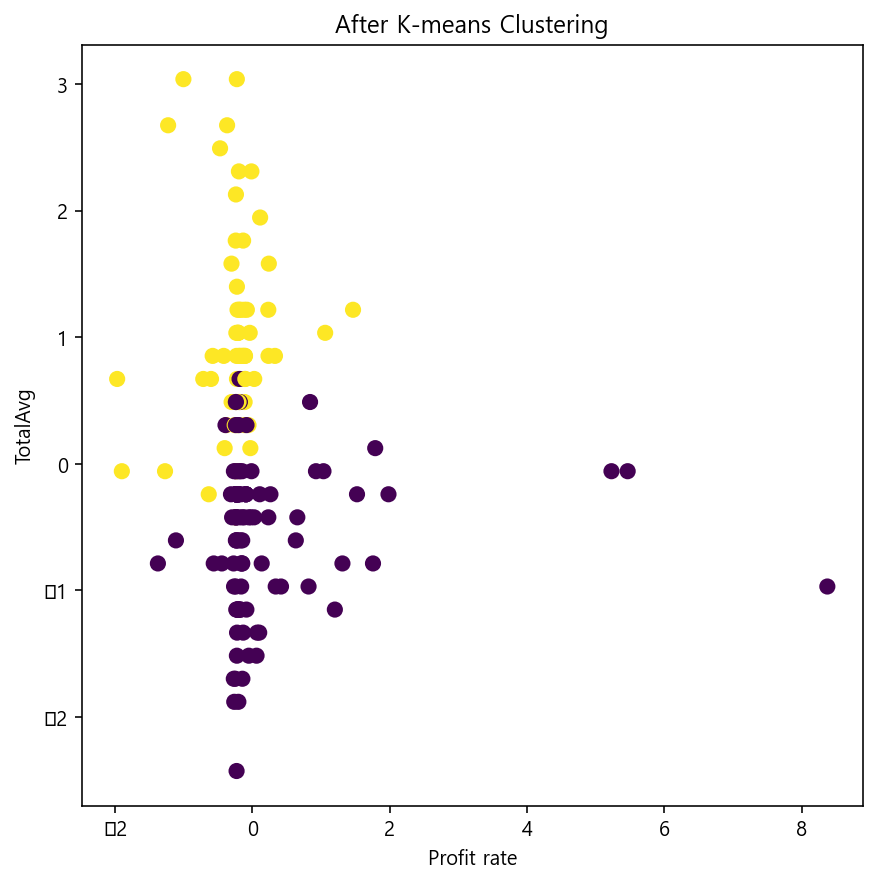

In [484]:
# 군집분류 결과 시각화
plt.figure(figsize=(7,7))
plt.scatter((features_std[:, 5]).reshape(-1,1),
 (features_std[:, 8 ]).reshape(-1,1), c=y_pred, s=50, cmap='viridis');

# plt.ylim(-1, 1)
# plt.xlim(-1, 1)

plt.xlabel("Profit rate") # x축 제목
plt.ylabel("TotalAvg") # y축 제목
plt.title("After K-means Clustering") # 그래프 제목
plt.show()

## k-means 군집화 3차원 시각화

In [494]:
# 군집화결과 라벨 데이터셋에 추가
df_kmeans = df3

In [495]:
# minmax 함수
def MinMaxScaler(df):
    df = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
    return df

In [496]:
df_kmeans = MinMaxScaler(df_kmeans)

In [497]:
df_kmeans['clusters'] = y_pred[0]

In [498]:
df_kmeans.dropna(inplace=True)

In [499]:
from mpl_toolkits.mplot3d import Axes3D # 3d plot

In [500]:
df_kmeans['clusters'].astype('int')

0      0
1      1
2      1
3      0
4      0
      ..
169    1
170    0
171    0
172    0
173    0
Name: clusters, Length: 160, dtype: int32

In [501]:
df_kmeans.columns

Index(['종업원수', '자산총계', '총부채', '자본총계', '매출액', '영업이익', '당기순이익', '영업이익률',
       'TotalAvg', 'Welfare', 'Balance', 'Culture', 'Promotion', 'Executive',
       'Recommend', 'Support', 'Growth', 'structure', 'locality_경기',
       'locality_대구', 'locality_대전', 'locality_서울', '규모_대기업', '규모_중견기업',
       '규모_중소기업', 'clusters'],
      dtype='object')

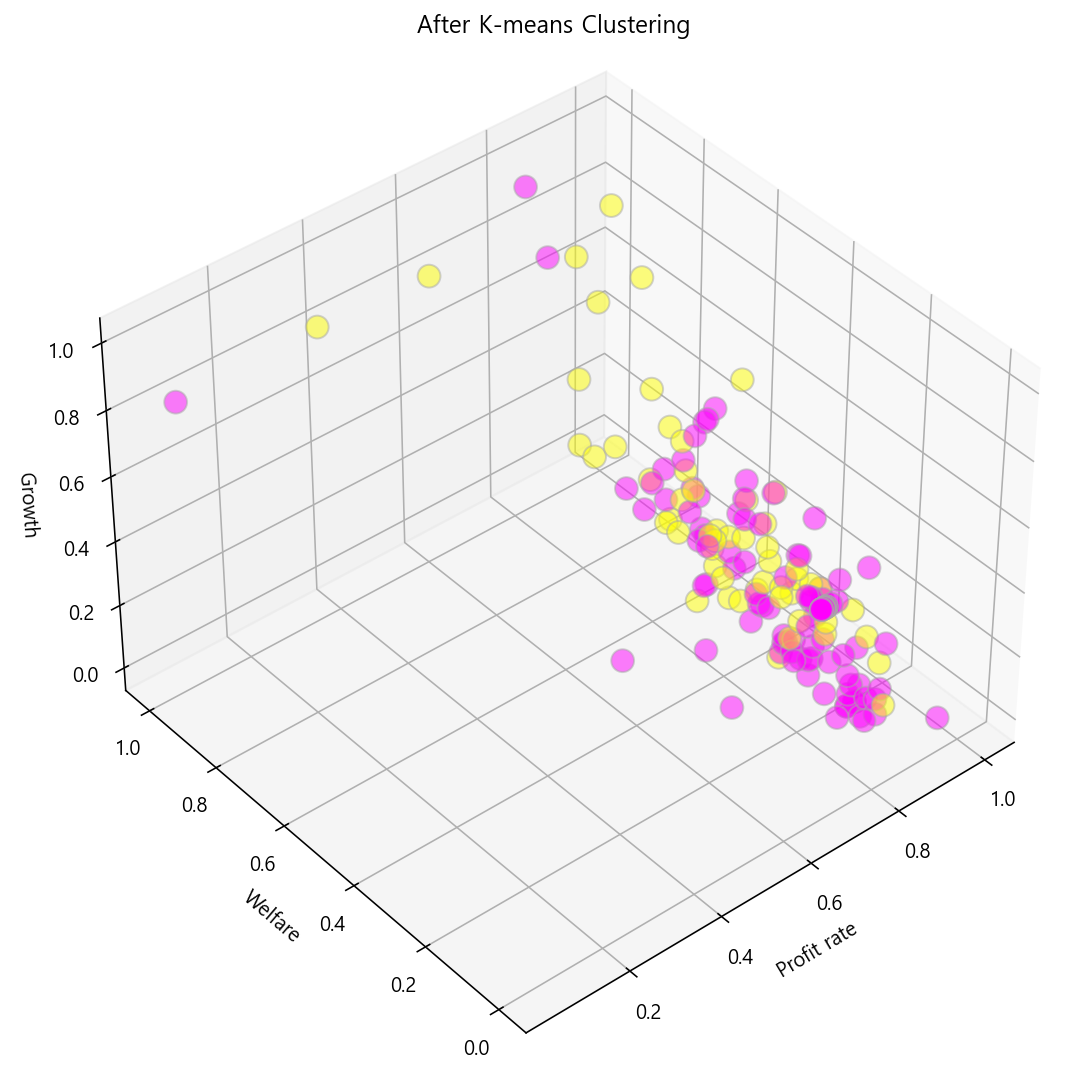

In [507]:
fig = plt.figure(figsize=(10,7))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 40, 
            azim = 230)

plt.cla()
ax.scatter(df_kmeans['영업이익률'], df_kmeans['Welfare'], df_kmeans['Growth'], 
           c = df_kmeans['clusters'], 
           s = 130, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Profit rate', 
              fontsize = 10)
ax.set_ylabel('Welfare', 
              fontsize = 10)
ax.set_zlabel('Growth', 
              fontsize = 10)
plt.title("After K-means Clustering") # 그래프 제목

plt.savefig('3d_plot.png')
plt.show()

# DBSCAN

In [508]:
from sklearn.cluster import DBSCAN

In [509]:
# 특성 스케일링(데이터 스케일링)
scaler = StandardScaler()
features = df3
# 앞서 Pandas의 Dataframe형태로 바뀐 iris.data값
features_std = scaler.fit_transform(features)

In [510]:
# K-means 모델 생성
model = DBSCAN(min_samples=3)
# Train model 
predict = pd.DataFrame(model.fit_predict(df3))

predict.columns=['predict']


In [511]:
predict.value_counts()

predict
-1         158
 3           4
 2           4
 1           4
 0           4
dtype: int64

In [512]:
df_DBSCAN = df3
df_DBSCAN['clusters'] = predict

In [513]:
df_DBSCAN['clusters']

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
      ... 
185    NaN
186    NaN
187    NaN
188    NaN
189    NaN
Name: clusters, Length: 174, dtype: float64

C:\Users\JuNoe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JuNoe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


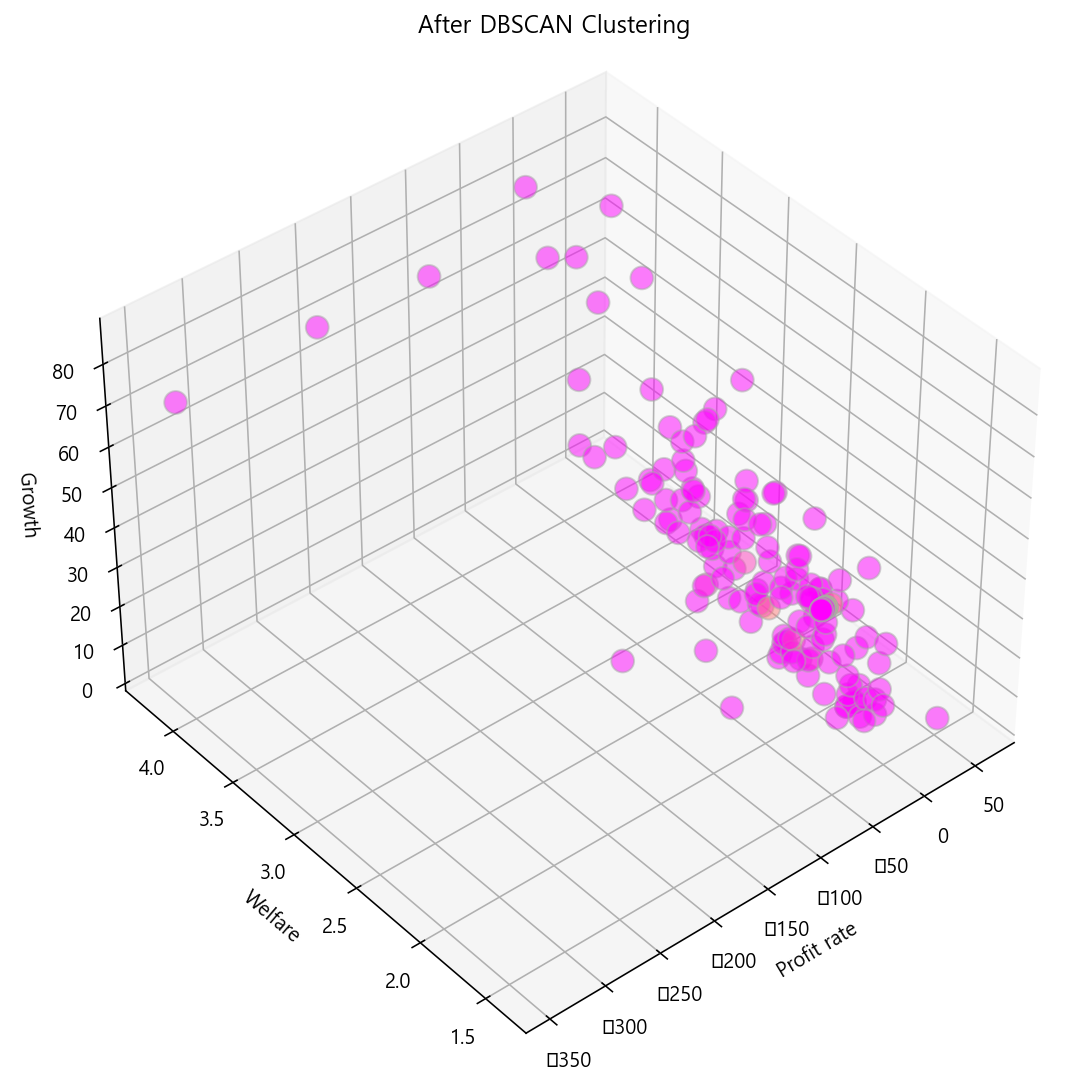

In [514]:
fig = plt.figure(figsize=(10,7))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 40, 
            azim = 230)

plt.cla()
ax.scatter(df_DBSCAN['영업이익률'], df_DBSCAN['Welfare'],df_DBSCAN['Growth'],
           c=df_DBSCAN['clusters'],
           s = 130, 
           marker='o',
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Profit rate', 
              fontsize = 10)
ax.set_ylabel('Welfare', 
              fontsize = 10)
ax.set_zlabel('Growth', 
              fontsize = 10)
plt.title("After DBSCAN Clustering") # 그래프 제목

plt.savefig('3d_plot.png')
plt.show()

# GMM

In [515]:
from sklearn.mixture import GaussianMixture

In [516]:
del df3['clusters']

In [517]:
df3

,종업원수,자산총계,총부채,자본총계,매출액,영업이익,당기순이익,영업이익률,TotalAvg,Welfare,...,Support,Growth,structure,locality_경기,locality_대구,locality_대전,locality_서울,규모_대기업,규모_중견기업,규모_중소기업
0,55.0,8855146.0,2587174.0,6267972.0,7298584.0,499772.0,495864.0,6.847520,2.1,2.1,...,23,12,0,0,0,0,1,0,0,1
1,23.0,3204125.0,1880449.0,1323677.0,1638871.0,-8744.0,9102.0,-0.533538,3.7,3.9,...,81,68,0,0,0,0,1,0,0,1
2,97.0,39356151.0,18697507.0,20658644.0,25189266.0,1007835.0,339024.0,4.001049,3.0,3.1,...,49,40,0,0,0,0,1,0,1,0
3,230.0,26041882.0,11659671.0,14382211.0,23801344.0,5178406.0,3948871.0,21.756780,2.2,2.2,...,29,15,0,0,0,0,1,0,0,1
4,53.0,2928737.0,1618737.0,1310001.0,10711521.0,468212.0,469136.0,4.371107,3.0,2.3,...,33,25,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,9.0,3445047.0,1841668.0,1603380.0,4269724.0,59709.0,42935.0,1.398428,3.3,3.2,...,64,64,1,1,0,0,0,0,0,1
186,6.0,3450742.0,2391453.0,1059289.0,3675795.0,250852.0,152862.0,6.824428,2.6,2.4,...,46,10,0,0,0,0,0,0,0,1
187,45.0,1877602.0,810098.0,1067504.0,6954259.0,352563.0,341846.0,5.069742,2.9,3.2,...,49,17,0,1,0,0,0,0,0,1
188,200.0,53236514.0,29862027.0,23374487.0,95056349.0,9186413.0,6859635.0,9.664176,2.7,2.7,...,47,47,0,0,0,0,1,0,0,1


In [529]:
df_GMM = MinMaxScaler(df3)

In [537]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(df_GMM)

In [538]:
gmm_labels

array([1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2,
       0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0],
      dtype=int64)

In [539]:
len(df_GMM)

174

In [540]:
df_GMM['clusters'] = gmm_labels

In [541]:
df_GMM['clusters'].value_counts()

1    71
2    57
0    46
Name: clusters, dtype: int64

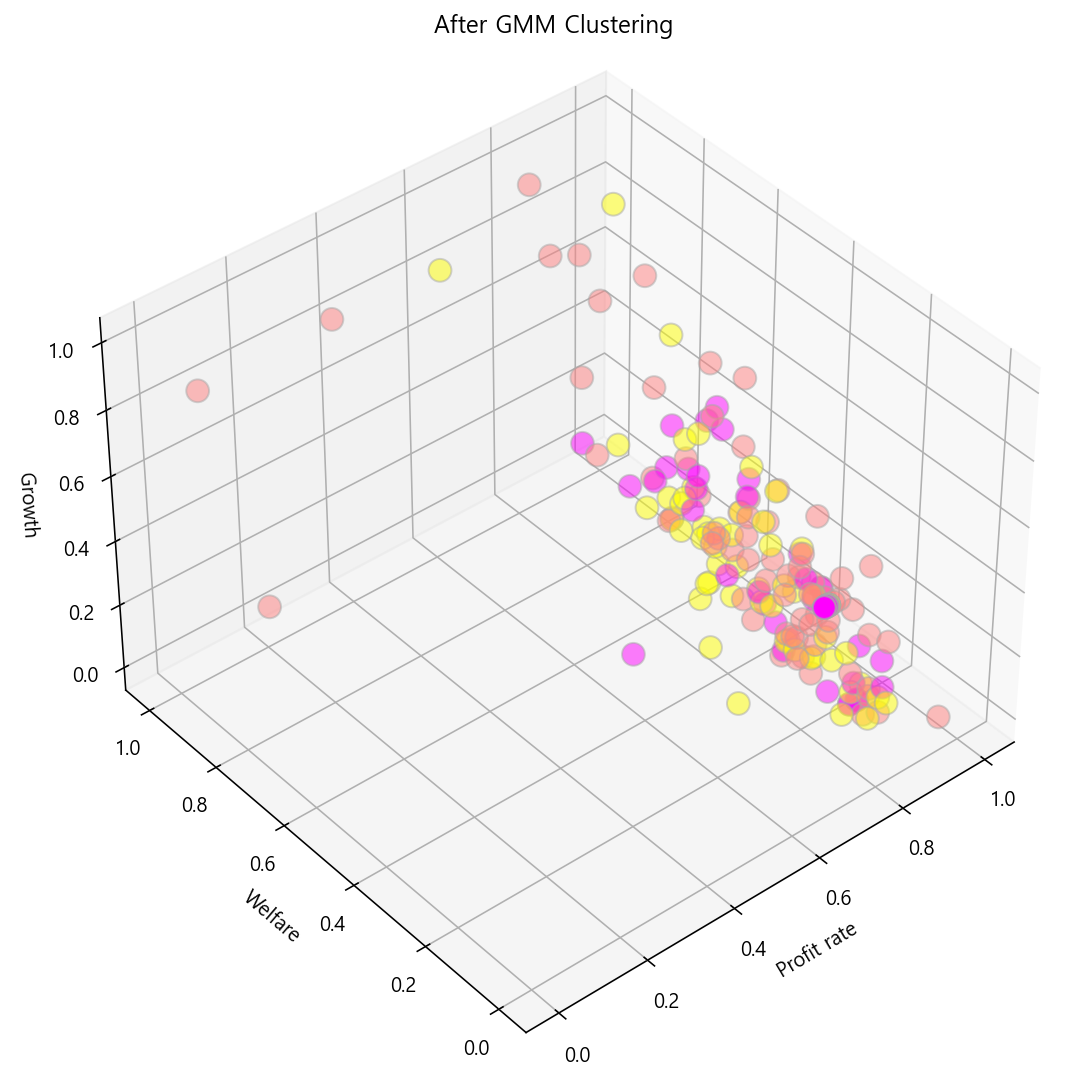

In [542]:
fig = plt.figure(figsize=(10,7))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 40, 
            azim = 230)

plt.cla()
ax.scatter(df_GMM['영업이익률'], df_GMM['Welfare'],df_GMM['Growth'],
           c=df_GMM['clusters'],
           s = 130, 
           marker='o',
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Profit rate', 
              fontsize = 10)
ax.set_ylabel('Welfare', 
              fontsize = 10)
ax.set_zlabel('Growth', 
              fontsize = 10)
plt.title("After GMM Clustering") # 그래프 제목

plt.savefig('3d_plot.png')
plt.show()

In [547]:
print("GMM 영업이익률 표준편차 :",np.std(df_GMM['영업이익률']))

K-Means 영업이익률 표준편차 : 0.09258437059567289
DBSCAN 영업이익률 표준편차 : 46.41819481980209
GMM 영업이익률 표준편차 : 0.11008788738798476


In [551]:
df_GMM_pivot = pd.pivot_table(data=df_GMM, index='clusters',
                                       values='영업이익률').reset_index()
df_GMM_pivot.head(3)

,clusters,영업이익률
0,0,0.863438
1,1,0.842982
2,2,0.856410


In [607]:
std_df = pd.DataFrame({'group':[0, 1, 2]})

In [608]:
np.std(df_GMM.loc[cond,'영업이익률'])

0.058546512242652775

In [609]:
# 클러스터 0의 영업이익률 표준편차 
cond1 = df_GMM['clusters'] == 0
cond2 = std_df['group'] == 0
std_df.loc[cond2, 'std'] = np.std(df_GMM.loc[cond1,'영업이익률'])

In [611]:
# 클러스터 1의 영업이익률 표준편차 
cond1 = df_GMM['clusters'] == 1
cond2 = std_df['group'] == 1
std_df.loc[cond2, 'std'] = np.std(df_GMM.loc[cond1,'영업이익률'])

In [613]:
# 클러스터 2의 영업이익률 표준편차 
cond1 = df_GMM['clusters'] == 2
cond2 = std_df['group'] == 2
std_df.loc[cond2, 'std'] = np.std(df_GMM.loc[cond1,'영업이익률'])

In [614]:
std_df

,group,std
0,0,0.058453
1,1,0.156701
2,2,0.058547


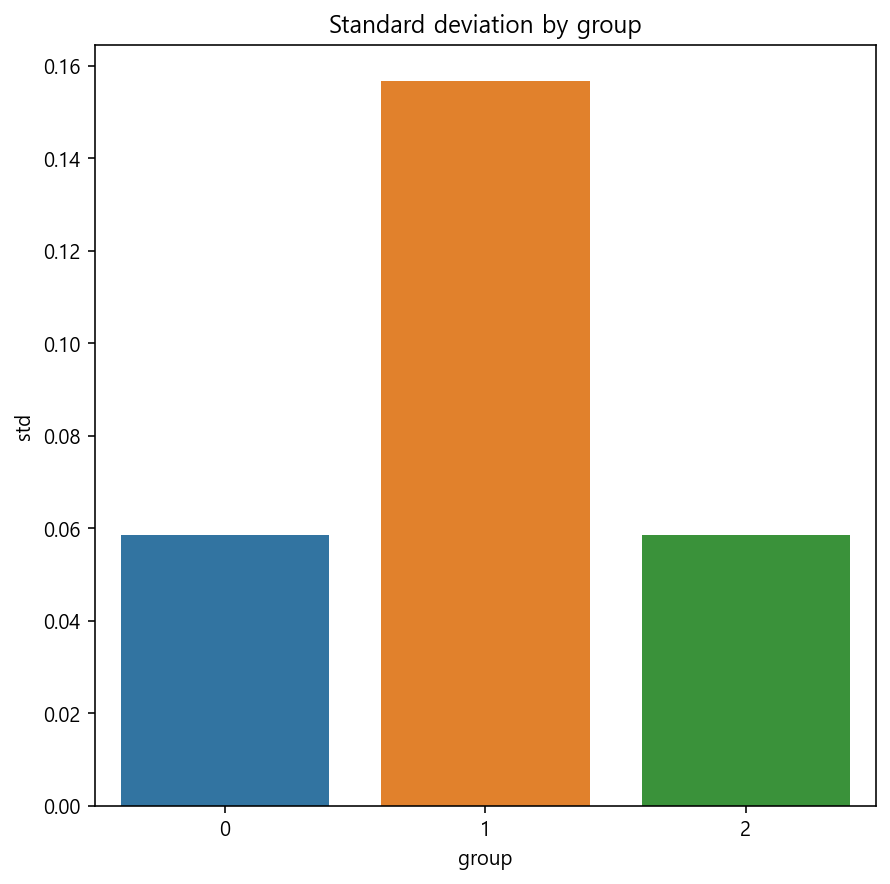

In [616]:
# 그룹별 표준편차
plt.figure(figsize=(7,7))
sns.barplot(data=std_df, x='group', y='std')

plt.title("Standard deviation by group") # 그래프 제목
plt.show()

In [556]:
df_GMM.to_csv('data/clustered_data.csv', encoding='cp949')

# 의사결정나무

In [643]:
import graphviz 

In [618]:
del df_GMM['영업이익률']

In [620]:
from sklearn import tree

In [632]:
X = df_GMM.iloc[:, :-1].to_numpy()

In [636]:
X.shape

(174, 24)

In [629]:
Y = df_GMM['clusters']

In [637]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)  

In [641]:
df_feature = df_GMM
del df_feature['clusters']

In [646]:
# 시각화
dot_data = tree.export_graphviz(clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = df_feature.columns,  # feature 이름
                               class_names = 'Group',  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)              
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH